# Import and Read data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

import re

from pathlib import Path

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antongerasimov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read data

In [2]:
main_dir = Path(os.path.abspath('')).parent
print(main_dir)

/Users/antongerasimov/Documents/EPAM/ds/project/final_project_epam_ds


In [3]:
main_dir = Path(os.path.abspath('')).parent
data_path = main_dir / 'data' / 'raw'
train_file_name = "train.csv"
test_file_name = "test.csv"

In [4]:
train_data = pd.read_csv(os.path.join(data_path, train_file_name))

In [5]:
test_data = pd.read_csv(os.path.join(data_path, test_file_name))

# Data preprocessing

## Methods

In [6]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [7]:
def clean_data(column):
  column = remove_url(column)
  column = remove_html_tags(column)
  column = remove_non_alphanumeric(column)
  column = convert_to_lowercase(column)
  column = remove_short_words(column)
  column = remove_stopwords(column)
  return column

In [8]:
def remove_url(review_text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(url_pattern, '', review_text)

In [9]:
def remove_html_tags(review_text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', review_text)

In [10]:
def remove_non_alphanumeric(review_text):
  return re.sub(r'[^a-zA-Z]', ' ', review_text)

In [11]:
def convert_to_lowercase(review_text):
  review_text = review_text.lower()
  return review_text

In [12]:
def remove_short_words(review_text, min_length=3):
    return ' '.join(word for word in review_text.split() if len(word) > min_length)

In [13]:
def remove_stopwords(review_text):
    STOPWORDS = set(stopwords.words('english'))
    words = review_text.split()
    filtered_words = [word for word in words if word.lower() not in STOPWORDS]
    return ' '.join(filtered_words)

In [14]:
def find_common_words(data):
  positive_review = data[data.sentiment == 'positive']['review']
  negative_review = data[data.sentiment == 'negative']['review']
  splited_review = [positive_review, negative_review]
  all_text_sets = [' '.join(examples) for examples in splited_review]

  top_words_sets = []

  for item, text_set in enumerate(all_text_sets):
    top_words_series = pd.Series(text_set.split()).value_counts().head(13)
    top_words = top_words_series.index.tolist()
    top_word_counts = top_words_series.values.tolist()
    top_words_sets.append(set(top_words))

  return set.intersection(*top_words_sets)

In [15]:
def remove_common_words_from_review(review_text, common_words):
    words = review_text.split()
    filtered_words = [word for word in words if word.lower() not in common_words]  # Consider case-insensitive matching
    return ' '.join(filtered_words)

In [16]:
def remove_common_words(current_data, common_words):
    current_data['review'] = current_data['review'].apply(lambda text: remove_common_words_from_review(text, common_words))
    return current_data

# Evaluating pipeline

## asdf

In [17]:
data = train_data.copy()
data['review'] = data['review'].apply(clean_data)

In [18]:
from collections import Counter
cnt = Counter()
for text in data['review'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('movie', 70374),
 ('film', 64037),
 ('like', 31952),
 ('good', 23826),
 ('time', 20097),
 ('even', 19827),
 ('would', 19726),
 ('really', 18544),
 ('story', 18456),
 ('well', 16940)]

In [19]:
positive_review = data[data.sentiment == 'positive']['review']
negative_review = data[data.sentiment == 'negative']['review']

In [32]:
positive_text = ' '.join(positive_review)
positive_word_counts = Counter(positive_text.split())

negative_text = ' '.join(negative_review)
negative_word_counts = Counter(negative_text.split())

In [33]:
unique_positive_words = [word for word, count in positive_word_counts.items() if count == 1]
unique_negative_words = [word for word, count in negative_word_counts.items() if count == 1]

print("Unique words in positive reviews:", unique_positive_words)
print("Unique words in negative reviews:", unique_negative_words)

Unique words in positive reviews: ['laia', 'chewabacca', 'salton', 'splenda', 'oxenby', 'coincedental', 'opertaion', 'crepe', 'cowed', 'sebeva', 'twas', 'timonn', 'hektor', 'jungman', 'benignly', 'beheadings', 'poissons', 'simpley', 'babelicious', 'varotto', 'duilio', 'prete', 'leonida', 'bottacin', 'piso', 'heiresses', 'adone', 'invective', 'twentish', 'tringtignant', 'baseline', 'posadas', 'moppets', 'meadowvale', 'ferror', 'chowderhead', 'demonwarp', 'troika', 'guervara', 'sangreal', 'ryans', 'paulsons', 'anonimul', 'verbalized', 'keighley', 'truncating', 'quaeda', 'flashforward', 'happend', 'breeziest', 'staffers', 'bertanzoni', 'whistlestop', 'tingled', 'infringed', 'pasko', 'odsak', 'lovretta', 'binam', 'rafters', 'parrallel', 'untie', 'wooooooooooooooonderful', 'laughting', 'nostradamus', 'curehead', 'defector', 'burtons', 'nantes', 'belami', 'kassir', 'gossebumps', 'bwahahahahha', 'anoes', 'shabbiness', 'cobblestoned', 'mcphillips', 'mclaglin', 'jihadists', 'daybreak', 'travola

In [29]:
len(unique_positive_words)

24894

In [30]:
len(unique_negative_words)

24045

In [31]:
cnt = Counter()

# Iterate over each review in the 'review' column of the DataFrame
for text in data['review'].values:
    # Split the review into individual words and update the Counter object
    cnt.update(text.split())

# Extract the number of unique words
num_unique_words = len(cnt)

print("Number of unique words in the dataset:", num_unique_words)

Number of unique words in the dataset: 88848


In [20]:
color = ['blue', 'green']
splited_review = [positive_review, negative_review]

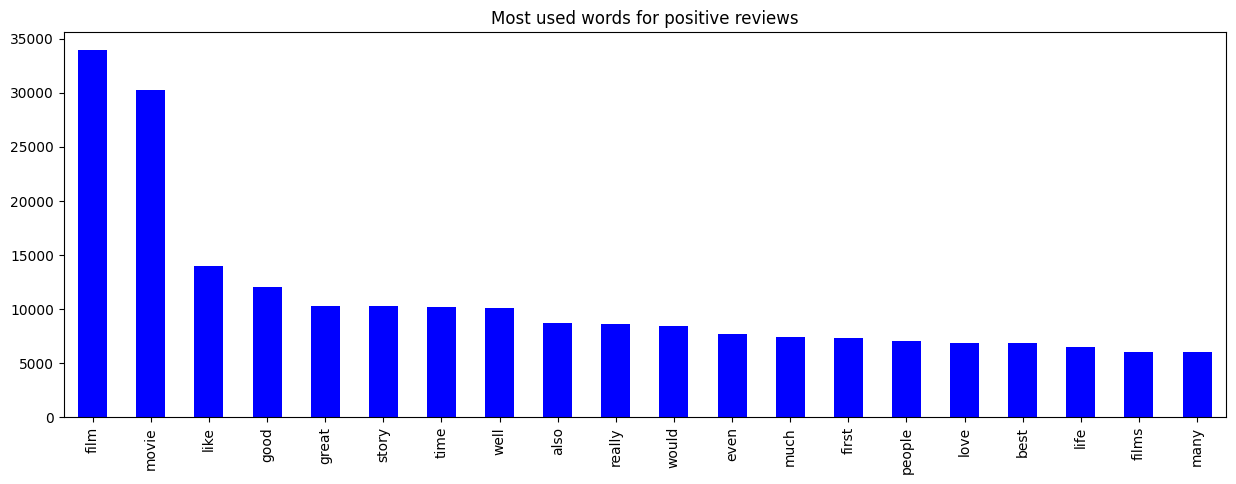

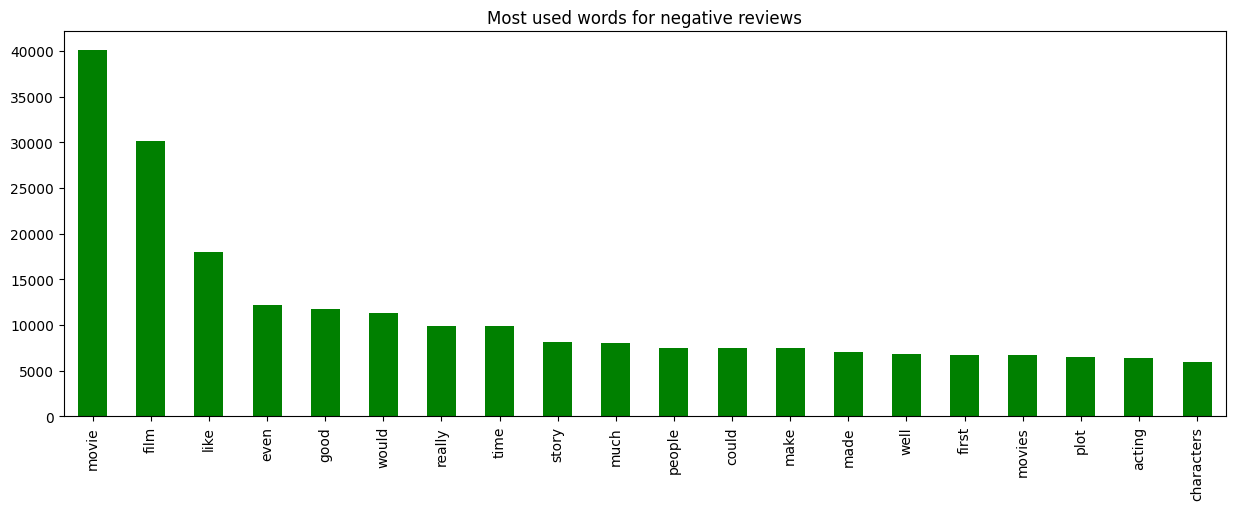

In [22]:
for item in range(2):
    plt.figure(figsize=(15,5))
    pd.Series(' '.join(splited_review[item]).split()).value_counts().head(20).plot(kind='bar', color=color[item])
    if item == 0:
        plt.title(f'Most used words for positive reviews')
    else:
        plt.title(f'Most used words for negative reviews')
    plt.show()

We can see, that 'movie', 'film', 'one', 'like', 'good'

# Saving common words from train_data

In [19]:
data_for_common_words = train_data.copy()
data_for_common_words['review'] = data_for_common_words['review'].apply(clean_data)

In [20]:
common_words = find_common_words(data_for_common_words)

In [21]:
common_words

{'even',
 'film',
 'good',
 'like',
 'movie',
 'much',
 'really',
 'story',
 'time',
 'would'}

In [ ]:
file_path = "/content/common_words.txt"

# Save common_words to the file
with open(file_path, 'w') as file:
    for word in common_words:
        file.write(word + '\n')

# Verify that the file has been created
!ls /content

common_words.txt  gdrive  sample_data
